In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pySankey import sankey
import warnings
warnings.filterwarnings("ignore")

---------------

### Load Data

In [19]:
dataframes = {}
nodelists = {}
genres = ['Country', 'Electronic', 'Pop', 'Rock']

In [20]:
for genre in genres:
    dataframes[genre] = pd.read_csv('../results/dataframes/df_' + genre.lower() + '.csv', index_col=0)
    nodelists[genre] = pd.read_csv('../results/node_lists/nodes_' + genre.lower() + '.csv')

----------------------

In [21]:
def create_nodelist(genre):
    df = nodelists[genre][['Id', 'sum_appearance']]
    
    df['percent'] = df['sum_appearance'] / df['sum_appearance'].sum()
    
    return df

In [22]:
def get_percentages(df, nodelist):

    df = df.groupby(df.columns.tolist(),as_index=False).size()
    df['percent'] = df['size'] / df['size'].sum()

    return df

--------------

### Markov Chain Functions

In [58]:
def get_markov_dataframe(genre, steps, threshold):
    if (steps < 2 or steps > 4):
        return
    
    from_list = []
    to_list = []

    if (steps == 2):
        for i, row in dataframes[genre].iterrows():
            from_list.append(row.from_roman)
            to_list.append(row.to_roman)

        markov = pd.DataFrame({'from': from_list, 'to': to_list})

    if (steps == 3):
        to_list2 = []
        for i, row in dataframes[genre].iterrows():
            if i > 0:
                from_list.append(dataframes[genre].iloc[i-1].from_roman)
                to_list.append(row.from_roman)
                to_list2.append(row.to_roman)

        markov = pd.DataFrame({'from': from_list, 'to1': to_list, 'to2': to_list2})
    
    if(steps == 4):
        to_list2 = []
        to_list3 = []

        for i, row in dataframes[genre].iterrows():
            if i > 1:
                from_list.append(dataframes[genre].iloc[i-2].from_roman)
                to_list.append(dataframes[genre].iloc[i-1].from_roman)
                to_list2.append(row.from_roman)
                to_list3.append(row.to_roman)

        markov = pd.DataFrame({'from': from_list, 'to1': to_list, 'to2': to_list2, 'to3': to_list3})

    nodes_markov = create_nodelist(genre)
    df_markov = get_percentages(markov, nodes_markov)
    df_markov = df_markov[df_markov['percent'] > threshold]

    if (steps == 2):
        from_to = df_markov['from']
    if (steps == 3):
        from_to = df_markov['from'] + ' - ' + df_markov['to1']
        df_markov = df_markov.rename(columns={'to2': 'to'})
    if(steps == 4):
        from_to = df_markov['from'] + ' - ' + df_markov['to1'] + ' - ' + df_markov['to2']
        df_markov = df_markov.rename(columns={'to3': 'to'})

    df_markov['from_to'] = from_to

    return df_markov

In [24]:
def plot_markov(df, genre, step):
    weight = df['percent'].values.astype(float)

    size = 10

    sankey.sankey(
        df['from_to'], df['to'], aspect=20,
        fontsize=size, leftWeight= weight, rightWeight=weight
    )
    fig = plt.gcf()
    fig.set_size_inches(size, size)
    fig.suptitle('Markov chain in ' + genre + ' for ' + str(step) + ' steps', fontsize=size*2)
    fig.show()

----------------------

## Top 5 ProgressionS

In [25]:
df = get_markov_dataframe('Country', steps=2, threshold=0.01).sort_values('percent', ascending=False).drop(columns=['from_to','size'])
print(df.head(5).to_string(index=False))

from to  percent
  IV  I 0.080062
   V  I 0.074288
   I  V 0.067744
   I IV 0.060046
   I  I 0.054657


In [26]:
df = get_markov_dataframe('Pop', steps=2, threshold=0.01).sort_values('percent', ascending=False).drop(columns=['from_to','size'])
print(df.head(5).to_string(index=False))

from to  percent
   V  I 0.042292
  IV  I 0.032248
  IV  V 0.030450
   I  V 0.028019
 VII VI 0.026750


In [27]:
df = get_markov_dataframe('Rock', steps=2, threshold=0.01).sort_values('percent', ascending=False).drop(columns=['from_to','size'])
print(df.head(5).to_string(index=False))

from to  percent
  IV  I 0.049822
   V  I 0.043694
   I  V 0.035975
   I IV 0.035226
  IV  V 0.028864


In [28]:
df = get_markov_dataframe('Electronic', steps=2, threshold=0.01).sort_values('percent', ascending=False).drop(columns=['from_to','size'])
print(df.head(5).to_string(index=False))

from  to  percent
  IV   I 0.044280
 VII   i 0.037334
 III VII 0.036249
   I   V 0.032993
   i  VI 0.032776


# Rock

,from,to1,to,size,percent,from_to
93,I,IV,I,121,0.005717,I - IV
771,IV,I,V,117,0.005528,IV - I
846,IV,IV,I,126,0.005954,IV - IV
888,IV,V,I,123,0.005812,IV - V
1214,V,I,IV,158,0.007466,V - I
1217,V,I,V,160,0.007560,V - I
1313,V,IV,I,212,0.010017,V - IV
1323,V,IV,V,123,0.005812,V - IV
1361,V,V,I,188,0.008883,V - V
3555,vi,IV,I,140,0.006615,vi - IV


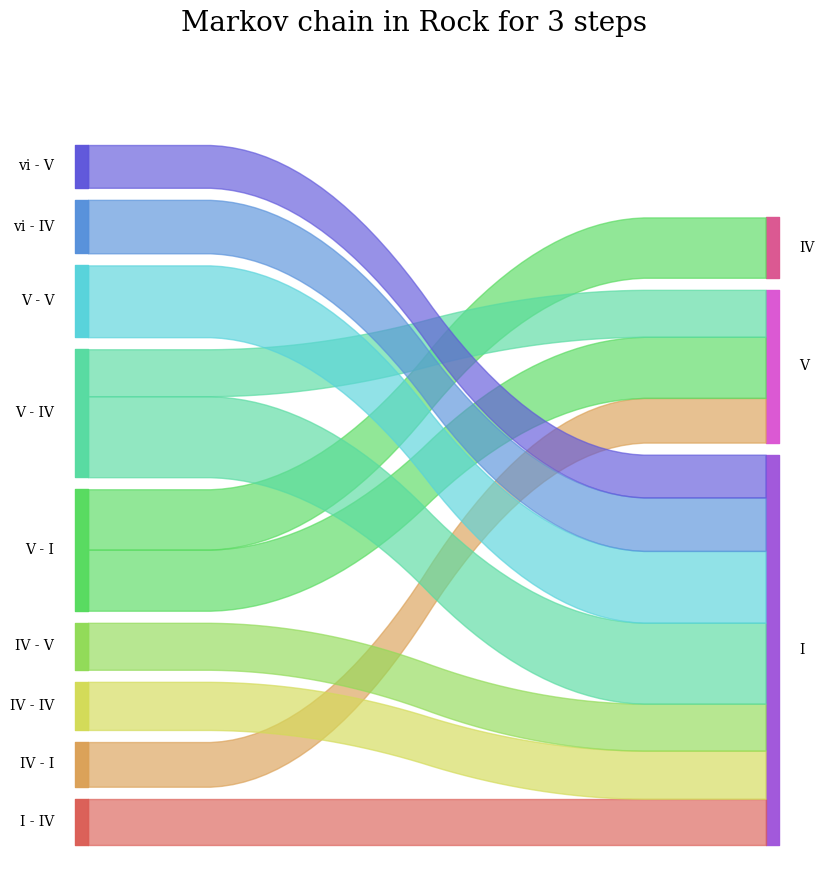

In [59]:
genre = 'Rock'

# step 2
df = get_markov_dataframe(genre, steps=2, threshold=0.02)
plot_markov(df, genre, 2)

# step 3
df = get_markov_dataframe(genre, steps=3, threshold=0.005)
display(df)
plot_markov(df, genre, 3)

# step 4
df = get_markov_dataframe(genre, steps=4, threshold=0.003)
plot_markov(df, genre, 4)

# Pop

,from,to1,to,size,percent,from_to
128,III,V,I,55,0.005875,III - V
472,V,IV,I,54,0.005769,V - IV
476,V,IV,V,49,0.005234,V - IV
495,V,V,I,78,0.008332,V - V
789,VI,V,I,53,0.005662,VI - V
1229,i,I,V,49,0.005234,i - I
1265,i,III,VII,47,0.005021,i - III
1280,i,IV,I,75,0.008012,i - IV
1286,i,IV,V,54,0.005769,i - IV
1309,i,V,I,65,0.006944,i - V


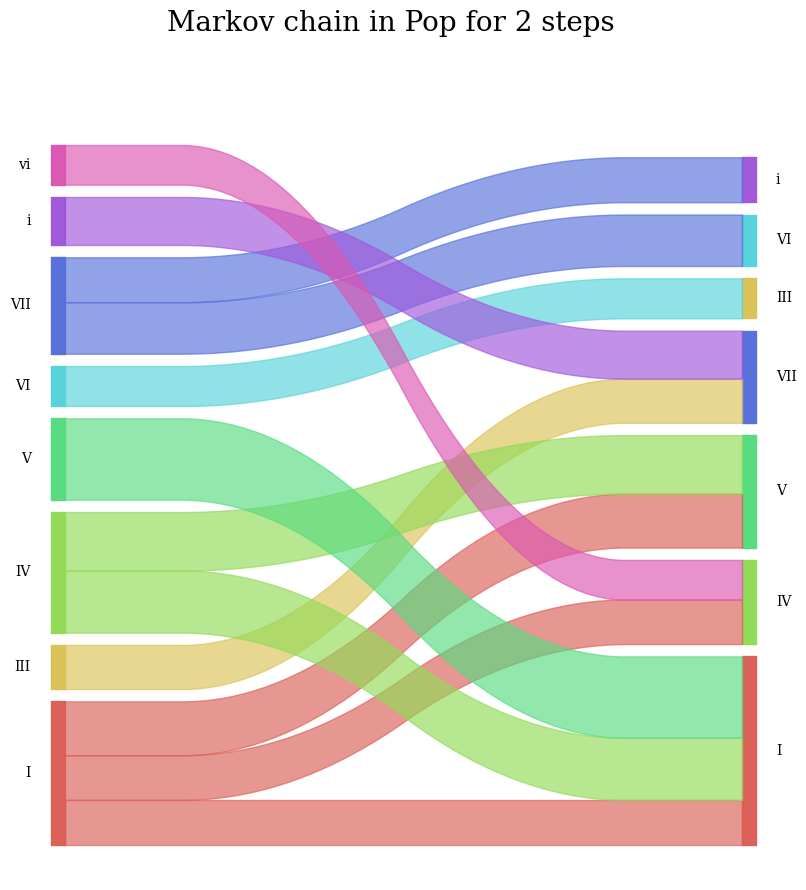

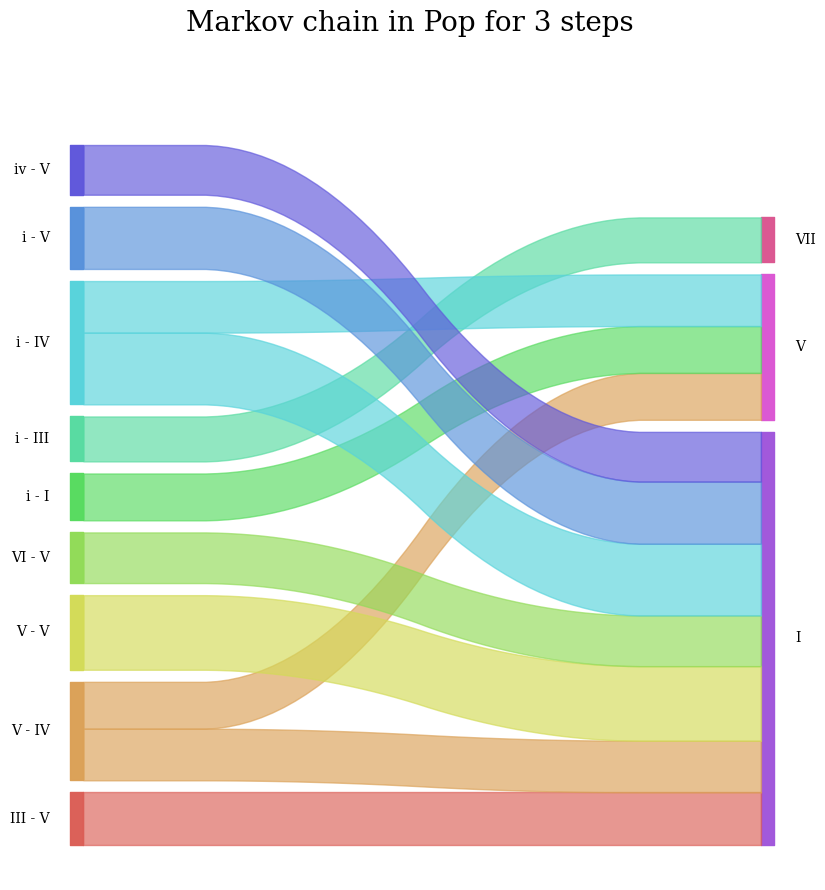

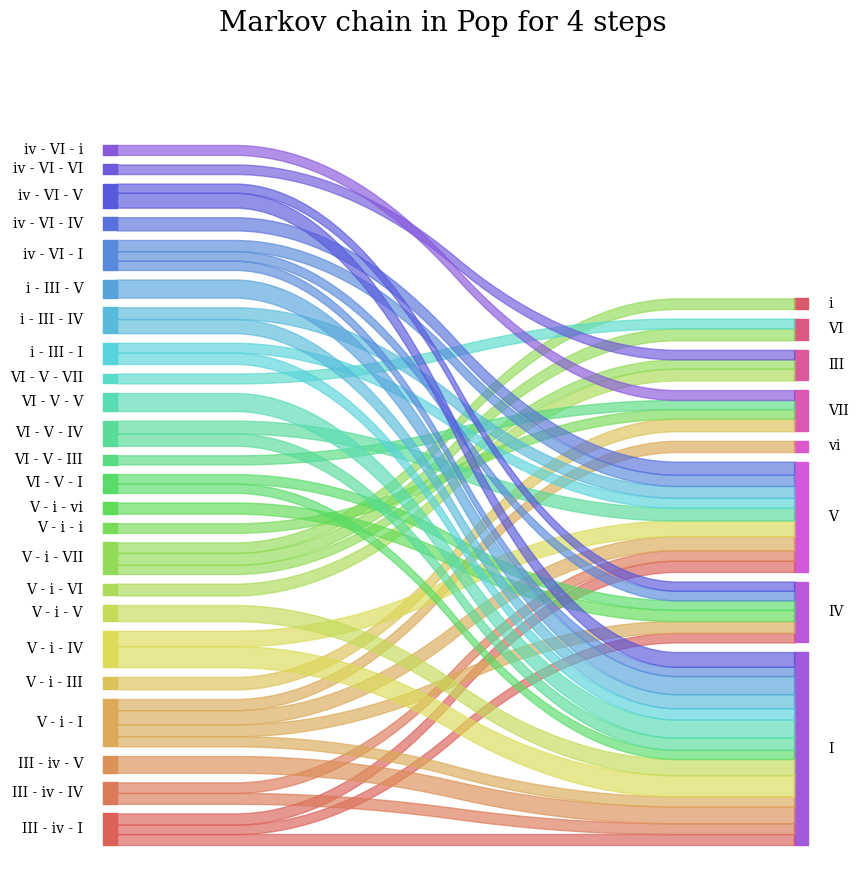

In [63]:
genre = 'Pop'

# step 2
df = get_markov_dataframe(genre, steps=2, threshold=0.02)
plot_markov(df, genre, 2)

# step 3
df = get_markov_dataframe(genre, steps=3, threshold=0.005)
display(df)
plot_markov(df, genre, 3)

# step 4
df = get_markov_dataframe(genre, steps=4, threshold=0.003)
plot_markov(df, genre, 4)

# Country

In [90]:
genre = 'Country'

# step 2
# df = get_markov_dataframe(genre, steps=2, threshold=0.02)
# plot_markov(df, genre, 2)

# # # step 3
# df = get_markov_dataframe(genre, steps=3, threshold=0.005)
# display(df)
# plot_markov(df, genre, 3)

# # step 4
# df = get_markov_dataframe(genre, steps=4, threshold=0.003)
# plot_markov(df, genre, 4)

df = get_markov_dataframe('Rock', steps=3, threshold=0.00)
display(df[df['from_to'] == 'IV - V'])
df = get_markov_dataframe('Pop', steps=3, threshold=0.00)
display(df[df['from_to'] == 'IV - V'])
df = get_markov_dataframe('Electronic', steps=3, threshold=0.00)
display(df[df['from_to'] == 'IV - V'])
df = get_markov_dataframe('Country', steps=3, threshold=0.00)
display(df[df['from_to'] == 'IV - V'])

,from,to1,to,size,percent,from_to
888,IV,V,I,123,0.005812,IV - V
889,IV,V,II,17,0.000803,IV - V
890,IV,V,II7,1,0.000047,IV - V
891,IV,V,III,2,0.000095,IV - V
892,IV,V,III7,1,0.000047,IV - V
893,IV,V,IV,72,0.003402,IV - V
894,IV,V,IVM7,4,0.000189,IV - V
895,IV,V,V,12,0.000567,IV - V
896,IV,V,V7,5,0.000236,IV - V
897,IV,V,VI,6,0.000284,IV - V


,from,to1,to,size,percent,from_to
324,IV,V,I,4,0.000427,IV - V
325,IV,V,II,2,0.000214,IV - V
326,IV,V,IV,7,0.000748,IV - V
327,IV,V,V,2,0.000214,IV - V
328,IV,V,V7,1,0.000107,IV - V
329,IV,V,vi,3,0.000320,IV - V


,from,to1,to,size,percent,from_to


,from,to1,to,size,percent,from_to
138,IV,V,I,4,0.001558,IV - V
139,IV,V,II,4,0.001558,IV - V
140,IV,V,ii,1,0.000389,IV - V


# Electronic

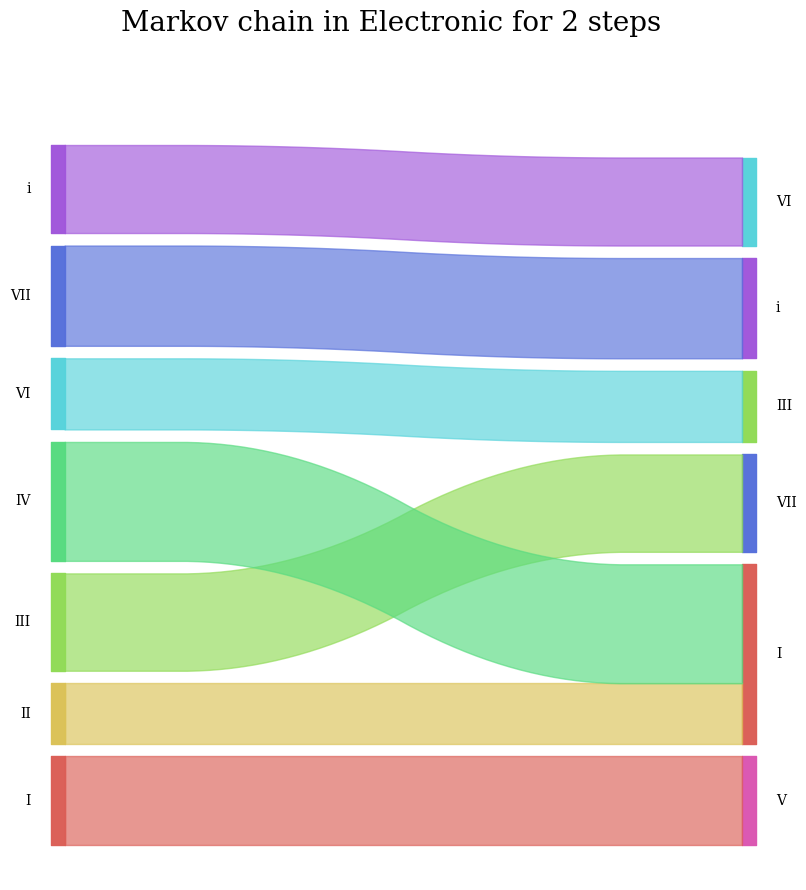

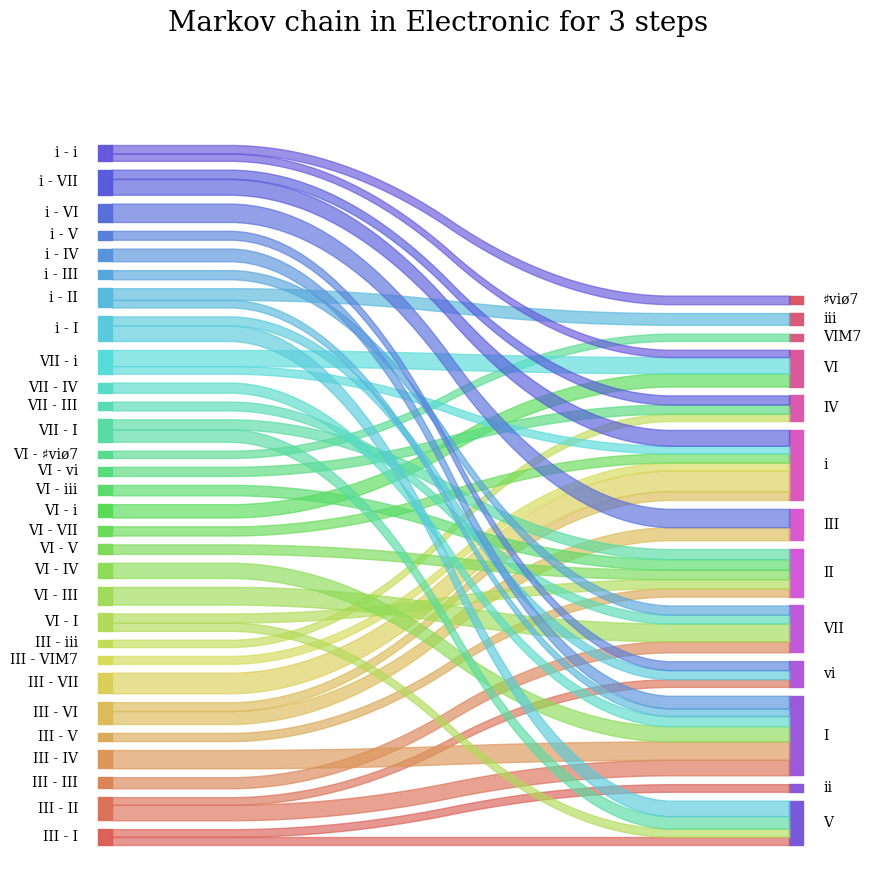

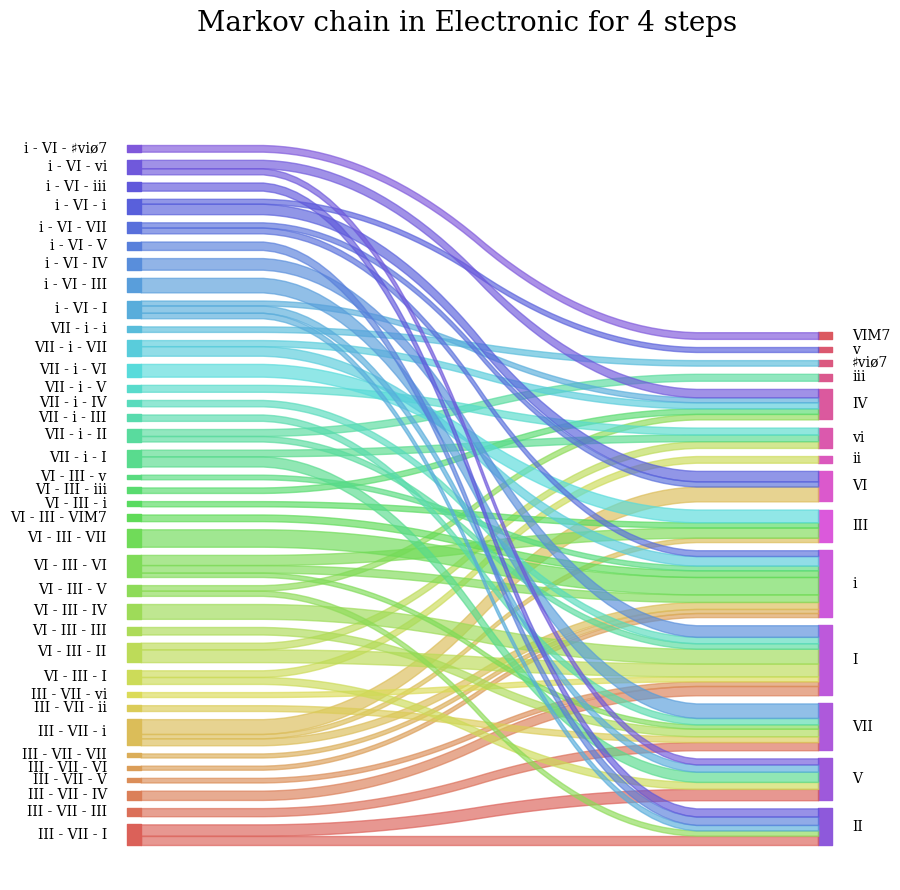

In [ ]:
genre = 'Electronic'

# step 2
df = get_markov_dataframe(genre, steps=2, threshold=0.02)
plot_markov(df, genre, 2)

# step 3
df = get_markov_dataframe(genre, steps=3, threshold=0.005)
plot_markov(df, genre, 3)

# step 4
df = get_markov_dataframe(genre, steps=4, threshold=0.003)
plot_markov(df, genre, 4)